# TASK ONE

### Batch and Online Processing:
In batch processing, the entire training sampling is made to pass through the perceptron or network of perceptron before weight update is done. Batch processing is efficient, require a lot of memory/computational resources and take longer for the network to converge to a local minimum. In batch processing, the size of the mini-batch is the same as the size of the entire training set. Batch processing is an extreme case of mini-batching. On the other hand, in online processing, samples are passed through the network individually and for each sample passed through the network, weight update is done. In online processing, weight update and convergence to the local minimum are faster and lesser memory is required. In online learning, mini-batch size is 1. It is on the second extreme od mini-batching.

### Gradient Descent and Stochastic Gradient Descent:
Gradient descent is the optimization algorithm utilized in batch learning. the algorithm computes the gradient of the loss function with respect to all the training examples in the dataset before updating the model’s parameters. This is as against stochastic gradient descent, the algorithm computes the gradient and updates the model’s parameters one example at a time, instead of waiting for the full dataset. The properties of gradient descent are similar to that of batch learning described above while the properties of stochastic gradient descent are also similar to those of online learning described above.

### Difference Between Perceptron and Sigmoid Neuron:
Perceptron are the simplest basic network of neurons with an input payer and an output layer. Perceptron have activation function that is a step function. That is the output of the activation function of a perceptron is either o or 1 and input are also usually binary numbers. On the other hand, sigmoid neurons have activation’s function which is a sigmoid function that output real numbers between 0 and 1.

### Feedforward and Backpropagation
In feedforward network of neurons, training samples are passed through the network from the input layer, through any hidden layers, to the output layer. The network processes the input data by performing a series of matrix multiplications and applying activation functions at each layer. The final result is the network's prediction. The unique aspect on feedforward network is that in every instance, inputs/weighted inputs can only move forward from one neuron to the next neuron and never backward. On the other hand, Backpropagation is the process used to train the neural network by adjusting its weights and biases. It calculates the error of the prediction made during feedforward and propagates this error backward through the network. This is done to update the model parameters in such a way that the error is minimized in the next iteration

### Why we Introduce Bias
Bias is usually introduced in neural network to ensure that neurons fire. A neuron is said to fire is it output non-zero output. In perceptron, bias also helps to reduce the threshold value to zero. Additionally, the bias term allows the activation function of a neuron to be shifted left or right, which helps the model capture patterns in the data more effectively.

### Difference Between Training, Validation and Test Set
In training neural network and some other machine learning models such as boosting and bagging algorithm, there is a validation dataset in addition to the conventional training and testing dataset. Training dataset is used in training used to train machine learning models to recognize pattern in dataset. Validation set is used during the training process to tune hyperparameters or adjust weight and arrive at optimal hyperparameter that ensures that the right model is selected and that there is not overfitting or underfitting. On the other hand, training dataset is used for model evaluation. That is, to carry out the final assessment of the model. While training and validation set are seen by the model during training, the test set is never seen during training. The ability of the model to perform well on the unseen training dataset is the final confirmation of the performance of the model.

### Reason Why Perceptron (MLP) and Sigmoid Neural Network Employ Different Activation Function
The Perceptron employs a step activation function because the cost function is designed to simply minimize the number of misclassified points rather than optimize a smooth function. On the other hand, The MLP typically uses a sigmoid activation function in its hidden layers, which is differentiable and allows for a smoother optimization process using gradient-based methods like backpropagationpropagation


# TASK TWO

In [15]:
# Library import
# Step 1: Install PyTorch (if needed)
# !pip install torch torchvision

# Step 2: Import required libraries
import numpy as np
import time
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import time
import matplotlib.pyplot as plt
from collections import Counter
import random

### MNIST Loader Class

In [17]:
"""
mnist_loader
~~~~~~~~~~~~

A library to load the MNIST image data. For details of the data
structures that are returned, see the doc strings for the class methods
`load_data` and `load_data_wrapper`. 
"""

#### Libraries
# Standard library
import pickle
import gzip

# Third-party libraries
import numpy as np

class MNISTLoader:
    def __init__(self, data_path='./data/mnist.pkl.gz'):
        """Initialize with the path to the MNIST dataset file."""
        self.data_path = data_path

    def load_data(self):
        """Return the MNIST data as a tuple containing the training data,
        the validation data, and the test data.

        The `training_data` is returned as a tuple with two entries.
        The first entry contains the actual training images. This is a
        numpy ndarray with 50,000 entries. Each entry is, in turn, a
        numpy ndarray with 784 values, representing the 28 * 28 = 784
        pixels in a single MNIST image.

        The second entry in the `training_data` tuple is a numpy ndarray
        containing 50,000 entries. Those entries are just the digit
        values (0...9) for the corresponding images contained in the first
        entry of the tuple.

        The `validation_data` and `test_data` are similar, except
        each contains only 10,000 images.
        """
        with gzip.open(self.data_path, 'rb') as f:
            training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
        return training_data, validation_data, test_data

    def load_data_wrapper(self):
        """Return a tuple containing `(training_data, validation_data,
        test_data)`. Based on `load_data`, but the format is more
        convenient for use in our implementation of neural networks.

        In particular, `training_data` is a list containing 50,000
        2-tuples `(x, y)`. `x` is a 784-dimensional numpy.ndarray
        containing the input image. `y` is a 10-dimensional
        numpy.ndarray representing the unit vector corresponding to the
        correct digit for `x`.

        `validation_data` and `test_data` are lists containing 10,000
        2-tuples `(x, y)`. In each case, `x` is a 784-dimensional
        numpy.ndarray containing the input image, and `y` is the
        corresponding classification, i.e., the digit values (integers)
        corresponding to `x`.

        This format is convenient for use in neural network code.
        """
        tr_d, va_d, te_d = self.load_data()
        training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
        training_results = [self.vectorized_result(y) for y in tr_d[1]]
        training_data = list(zip(training_inputs, training_results))
        validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
        validation_data = list(zip(validation_inputs, va_d[1]))
        test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
        test_data = list(zip(test_inputs, te_d[1]))
        return training_data, validation_data, test_data

    @staticmethod
    def vectorized_result(j):
        """Return a 10-dimensional unit vector with a 1.0 in the jth
        position and zeroes elsewhere. This is used to convert a digit
        (0...9) into a corresponding desired output from the neural
        network."""
        e = np.zeros((10, 1))
        e[j] = 1.0
        return e

### The Four Bayesian Classifier

In [19]:
# Load data
loader = MNISTLoader()
training_data, validation_data, test_data = loader.load_data_wrapper()  # Load data

In [184]:
# Function to calculate accuracy and class-wise accuracy
def calculate_accuracy(y_true, y_pred):
    overall_accuracy = np.mean(y_true == y_pred)
    class_accuracies = {cls: np.mean(y_pred[y_true == cls] == cls) for cls in np.unique(y_true)}
    return overall_accuracy, class_accuracies

# KNN Classifier Implementation for MNIST
def knn_classifier(X_train, y_train, X_test, k=15):
    predictions = []
    for x in X_test:
        # Calculate Euclidean distances to all training samples
        distances = np.linalg.norm(X_train - x, axis=1)
        # Get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:k]
        # Predict the class with the majority vote
        k_nearest_labels = y_train[k_indices]  # Ensure this is a 1D array of labels
        prediction = Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(prediction)
    return np.array(predictions)

def euclidean_classifier(X_train, y_train, X_test):
    # Ensure y_train is a 1D array
    y_train = np.squeeze(y_train)
    
    # Check if the number of samples in X_train and y_train match
    assert X_train.shape[0] == y_train.shape[0], "Mismatch between X_train and y_train dimensions."

    # Compute the mean vector for each class
    mean_vectors = {cls: np.mean(X_train[y_train == cls], axis=0) for cls in np.unique(y_train)}
    
    predictions = []
    for x in X_test:
        # Calculate Euclidean distance between the test sample and each class mean
        distances = {cls: np.linalg.norm(x - mean_vector) for cls, mean_vector in mean_vectors.items()}
        # Get the class with the minimum distance
        predicted_class = min(distances, key=distances.get)
        predictions.append(predicted_class)
    
    return np.array(predictions)

# Mahalanobis Distance Classifier Implementation
def mahalanobis_classifier(X_train, y_train, X_test, reg_term=1e-5):
    mean_vectors = {cls: np.mean(X_train[y_train == cls], axis=0) for cls in np.unique(y_train)}
    cov = np.cov(X_train, rowvar=False)
    cov += reg_term * np.eye(cov.shape[0])
    inv_cov = np.linalg.inv(cov)
    predictions = []
    for x in X_test:
        distances = []
        for cls, mean_vec in mean_vectors.items():
            dist = np.sqrt(np.dot(np.dot((x - mean_vec), inv_cov), (x - mean_vec).T))
            distances.append(dist)
        predictions.append(np.argmin(distances))
    return np.array(predictions)

def qda_classifier(X_train, y_train, X_test, reg_term=1e-5):
    class_stats = {}
    
    # Compute mean for each class
    for cls in np.unique(y_train):
        mean_cls = np.mean(X_train[y_train == cls], axis=0)
        class_stats[cls] = {'mean': mean_cls}
    
    # Compute the shared covariance matrix across all classes
    cov_shared = np.cov(X_train, rowvar=False)
    
    # Regularize the shared covariance matrix
    cov_shared += reg_term * np.eye(cov_shared.shape[0])
    
    # Precompute the inverse of the shared covariance matrix
    cov_inv = np.linalg.inv(cov_shared)
    
    predictions = []
    
    # Classify each sample in X_test
    for x in X_test:
        discriminants = []
        for cls, stats in class_stats.items():
            mean = stats['mean']
            
            # Compute the discriminant function for LDA
            try:
                g = np.dot(np.dot(x, cov_inv), mean.T) - 0.5 * np.dot(np.dot(mean, cov_inv), mean.T)
            except np.linalg.LinAlgError:
                # Handle non-invertible covariance matrix by assigning a low score
                g = -np.inf
            discriminants.append((g, cls))  # Store (discriminant, class) pair
        
        # Choose the class with the highest discriminant score
        best_class = max(discriminants, key=lambda pair: pair[0])[1]
        predictions.append(best_class)
    
    return np.array(predictions)

# Function to fit and evaluate each classifier
def evaluate_classifiers(X_train, y_train, X_test, y_test):
    classifiers = {
        'KNN': knn_classifier,
        'Euclidean': euclidean_classifier,
        'Mahalanobis': mahalanobis_classifier,
        'QDA': qda_classifier
    }
    
    results = []
    
    for name, classifier in classifiers.items():
        start_time = time.time()
        
        if name == 'KNN':
            y_pred = classifier(X_train, y_train, X_test, k=15)
        else:
            y_pred = classifier(X_train, y_train, X_test)
        
        overall_accuracy, classwise_accuracy = calculate_accuracy(y_test, y_pred)
        end_time = time.time()
        run_time = time.time() - start_time
        results.append([name, overall_accuracy, classwise_accuracy, run_time])
    
    return results

# Function to display results
def display_results(results):
    print("Summary of Classification Performance:")
    print(f"{'Classifier':<15}{'Overall Accuracy':<20}{'Classwise Accuracy':<60}{'Run Time (s)':<10}")
    for row in results:
        classwise_str = ', '.join([f"{cls}: {acc:.4f}" for cls, acc in row[2].items()])
        print(f"{row[0]:<15}{row[1]:<20.4f}{classwise_str:<60}{row[3]:<10.4f}")

# Main function to split data and run classifiers
def main(data_train, data_test):
    # Assuming data_train and data_test are numpy arrays of tuples (image, label)
    X_train = np.array([x[0].flatten() for x in data_train])
    y_train = np.array([x[1] for x in data_train])
    X_test = np.array([x[0].flatten() for x in data_test])
    y_test = np.array([x[1] for x in data_test])
    # Convert y_train from one-hot encoding to class labels
    y_train = np.argmax(y_train, axis=1).squeeze()

    # Evaluate all classifiers
    results = evaluate_classifiers(X_train, y_train, X_test, y_test)
    
    # Display results
    display_results(results)

loader = MNISTLoader()

# Load the data
training_data, validation_data, test_data = loader.load_data_wrapper()  # Load data

# Convert the training and test data into the required format
# training_data and test_data are assumed to be a list of tuples (image, label)
data_train = training_data  # Use directly as it's already a list of tuples
data_test = test_data  # Use directly as it's already a list of tuples

# Run the main function to fit classifiers and evaluate
main(data_train, data_test)

Summary of Classification Performance:
Classifier     Overall Accuracy    Classwise Accuracy                                          Run Time (s)
KNN            0.9635              0: 0.9898, 1: 0.9965, 2: 0.9380, 3: 0.9693, 4: 0.9521, 5: 0.9652, 6: 0.9833, 7: 0.9523, 8: 0.9333, 9: 0.95241342.7440 
Euclidean      0.8200              0: 0.8939, 1: 0.9621, 2: 0.7578, 3: 0.8030, 4: 0.8259, 5: 0.6861, 6: 0.8653, 7: 0.8317, 8: 0.7372, 9: 0.80670.6825    
Mahalanobis    0.8637              0: 0.9388, 1: 0.9542, 2: 0.7888, 3: 0.8713, 4: 0.8880, 5: 0.8094, 6: 0.8820, 7: 0.8220, 8: 0.8234, 9: 0.846420.4964   
QDA            0.8637              0: 0.9388, 1: 0.9542, 2: 0.7888, 3: 0.8713, 4: 0.8880, 5: 0.8094, 6: 0.8820, 7: 0.8220, 8: 0.8234, 9: 0.846436.0289   


# TASK 3

In [21]:
# The network framework
class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network. For example, if the list
        was [2, 3, 1], it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron. The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0 and variance 1. Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent. The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs. The other non-optional parameters are self-explanatory.
        If ``test_data`` is provided, the network will be evaluated
        against the test data after each epoch, and partial progress printed
        out. This is useful for tracking progress but slows things down
        substantially."""
        if test_data: 
            n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {0}: {1} / {2}".format(
                    j, self.evaluate(test_data), n_test))
            else:
                print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini-batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w - (eta / len(mini_batch)) * nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - (eta / len(mini_batch)) * nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x]  # list to store all the activations, layer by layer
        zs = []  # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. The network's output is assumed 
        to be the index of whichever neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \\partial C_x /
        \\partial a for the output activations."""
        return (output_activations - y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z) * (1 - sigmoid(z))

In [9]:
# using the mnist loader created to load the MNIST image data
loader = MNISTLoader()
training_data, validation_data, test_data = \
loader.load_data_wrapper()

In [159]:
# testing the network
# create a network with 784 input neuron, 30 hidden neuron an 10 output neauron
net = Network([784, 30, 10])

# train the network on training data for 1 epoch, 10 mini-batch size and learning rate of 10
net.SGD(training_data, 5, 10, 3.0, test_data=test_data)

Epoch 0: 9072 / 10000
Epoch 1: 9156 / 10000
Epoch 2: 9256 / 10000
Epoch 3: 9304 / 10000
Epoch 4: 9332 / 10000


# TASK 3.1

Epoch 0: 9359 / 10000
Epoch 0: 9359 / 10000
Epoch 0: 9352 / 10000
Epoch 1: 9352 / 10000
Epoch 0: 9369 / 10000
Epoch 2: 9369 / 10000
Epoch 0: 9379 / 10000
Epoch 3: 9379 / 10000
Epoch 0: 9419 / 10000
Epoch 4: 9419 / 10000
Epoch 0: 9420 / 10000
Epoch 5: 9420 / 10000
Epoch 0: 9415 / 10000
Epoch 6: 9415 / 10000
Epoch 0: 9433 / 10000
Epoch 7: 9433 / 10000
Epoch 0: 9443 / 10000
Epoch 8: 9443 / 10000
Epoch 0: 9438 / 10000
Epoch 9: 9438 / 10000
Epoch 0: 9417 / 10000
Epoch 10: 9417 / 10000
Epoch 0: 9429 / 10000
Epoch 11: 9429 / 10000
Epoch 0: 9439 / 10000
Epoch 12: 9439 / 10000
Epoch 0: 9473 / 10000
Epoch 13: 9473 / 10000
Epoch 0: 9415 / 10000
Epoch 14: 9415 / 10000
Epoch 0: 9455 / 10000
Epoch 15: 9455 / 10000
Epoch 0: 9447 / 10000
Epoch 16: 9447 / 10000
Epoch 0: 9437 / 10000
Epoch 17: 9437 / 10000
Epoch 0: 9463 / 10000
Epoch 18: 9463 / 10000
Epoch 0: 9450 / 10000
Epoch 19: 9450 / 10000
Epoch 0: 9453 / 10000
Epoch 20: 9453 / 10000
Epoch 0: 9454 / 10000
Epoch 21: 9454 / 10000
Epoch 0: 9465 / 1000

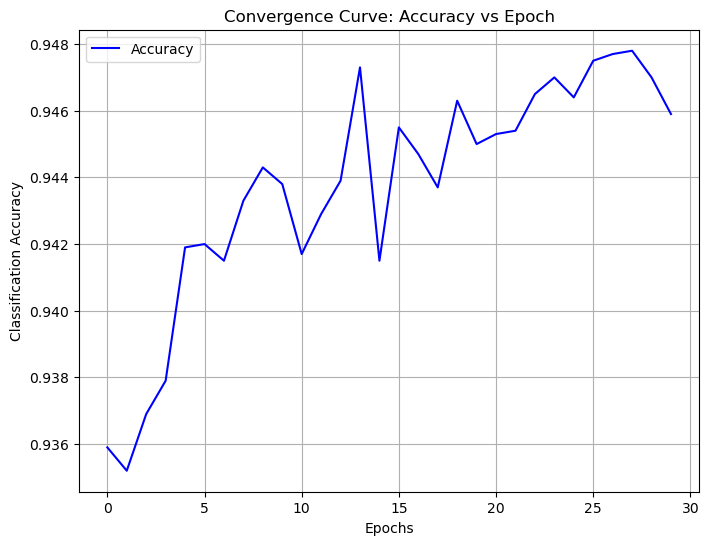

In [161]:
def train_and_plot(network, training_data, test_data, epochs, mini_batch_size, eta):
    """
    Train the network and store accuracy for each epoch. Then, plot the convergence curve.
    
    Parameters:
    network: Instance of the Network class
    training_data: List of tuples (input, output) for training
    test_data: List of tuples (input, output) for testing
    epochs: Number of training epochs
    mini_batch_size: Size of mini-batches
    eta: Learning rate
    """
    accuracy_per_epoch = []

    # Train the network and store the accuracy after each epoch
    for epoch in range(epochs):
        network.SGD(training_data, 1, mini_batch_size, eta, test_data=test_data)  # Train for 1 epoch
        accuracy = network.evaluate(test_data)
        accuracy_per_epoch.append(accuracy / len(test_data))  # Store accuracy as a percentage
        print(f"Epoch {epoch}: {accuracy} / {len(test_data)}")
    
    # Plot the convergence curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(epochs), accuracy_per_epoch, label='Accuracy', color='blue')
    plt.title("Convergence Curve: Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Classification Accuracy")
    plt.grid(True)
    plt.legend()
    plt.show()

# Train and plot
train_and_plot(net, training_data, test_data, epochs=30, mini_batch_size=10, eta=3.0)

# TASK 3.2

## EFFECT OF NETWORK STRUCTURE

Epoch 0: 5336 / 10000
Epoch 0: 5336 / 10000
Epoch 0: 5862 / 10000
Epoch 1: 5862 / 10000
Epoch 0: 6356 / 10000
Epoch 2: 6356 / 10000
Epoch 0: 6415 / 10000
Epoch 3: 6415 / 10000
Epoch 0: 6459 / 10000
Epoch 4: 6459 / 10000
Epoch 0: 6463 / 10000
Epoch 5: 6463 / 10000
Epoch 0: 6473 / 10000
Epoch 6: 6473 / 10000
Epoch 0: 6489 / 10000
Epoch 7: 6489 / 10000
Epoch 0: 6500 / 10000
Epoch 8: 6500 / 10000
Epoch 0: 6519 / 10000
Epoch 9: 6519 / 10000
Epoch 0: 6526 / 10000
Epoch 10: 6526 / 10000
Epoch 0: 6535 / 10000
Epoch 11: 6535 / 10000
Epoch 0: 7217 / 10000
Epoch 12: 7217 / 10000
Epoch 0: 7351 / 10000
Epoch 13: 7351 / 10000
Epoch 0: 7378 / 10000
Epoch 14: 7378 / 10000
Epoch 0: 7398 / 10000
Epoch 15: 7398 / 10000
Epoch 0: 7419 / 10000
Epoch 16: 7419 / 10000
Epoch 0: 7455 / 10000
Epoch 17: 7455 / 10000
Epoch 0: 7577 / 10000
Epoch 18: 7577 / 10000
Epoch 0: 8247 / 10000
Epoch 19: 8247 / 10000
Epoch 0: 9111 / 10000
Epoch 20: 9111 / 10000
Epoch 0: 9145 / 10000
Epoch 21: 9145 / 10000
Epoch 0: 9153 / 1000

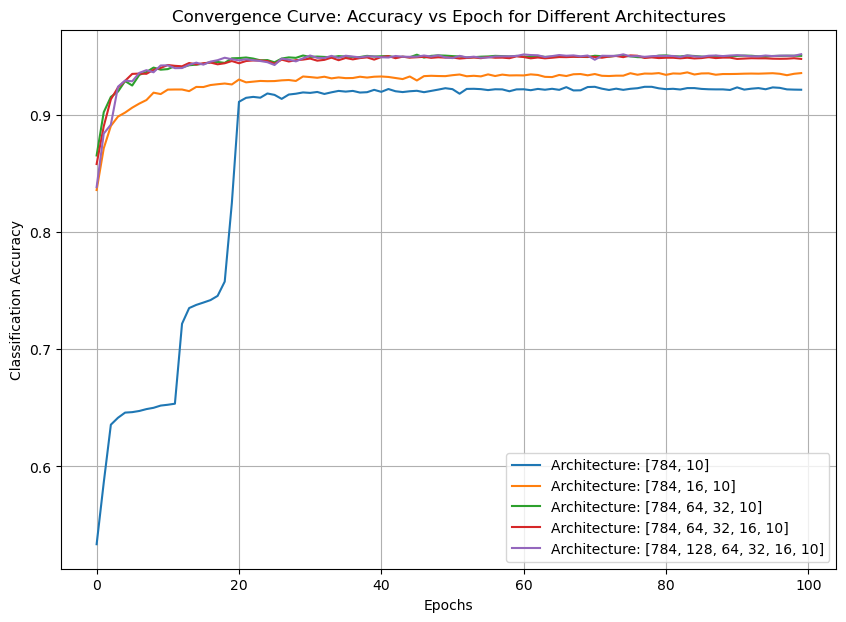

In [11]:
def train_and_store_accuracy(network, training_data, test_data, epochs, mini_batch_size, eta):
    """
    Train the network and store accuracy for each epoch.
    
    Parameters:
    network: Instance of the Network class
    training_data: List of tuples (input, output) for training
    test_data: List of tuples (input, output) for testing
    epochs: Number of training epochs
    mini_batch_size: Size of mini-batches
    eta: Learning rate
    
    Returns:
    accuracy_per_epoch: List of accuracy values for each epoch
    """
    accuracy_per_epoch = []

    for epoch in range(epochs):
        network.SGD(training_data, 1, mini_batch_size, eta, test_data=test_data)  # Train for 1 epoch
        accuracy = network.evaluate(test_data)
        accuracy_per_epoch.append(accuracy / len(test_data))  # Store accuracy as a percentage
        print(f"Epoch {epoch}: {accuracy} / {len(test_data)}")

    return accuracy_per_epoch


def plot_convergence_curves(training_data, test_data, epochs, mini_batch_size, eta, architectures):
    """
    Train and plot convergence curves for different network architectures.
    
    Parameters:
    training_data: Training dataset
    test_data: Test dataset
    epochs: Number of epochs
    mini_batch_size: Mini-batch size
    eta: Learning rate
    architectures: List of architectures (each a list representing the number of neurons per layer)
    """
    plt.figure(figsize=(10, 7))

    for architecture in architectures:
        # Initialize the network with the given architecture
        net = Network(architecture)
        # Train the network and get accuracy per epoch
        accuracy_per_epoch = train_and_store_accuracy(net, training_data, test_data, epochs, mini_batch_size, eta)
        # Plot the accuracy curve for this architecture
        plt.plot(range(epochs), accuracy_per_epoch, label=f"Architecture: {architecture}")

    # Plot details
    plt.title("Convergence Curve: Accuracy vs Epoch for Different Architectures")
    plt.xlabel("Epochs")
    plt.ylabel("Classification Accuracy")
    plt.grid(True)
    plt.legend()
    plt.show()

# Define the network architectures to test
architectures = [
    [784, 10],         # 0 hidden layers (baseline)
    [784, 16, 10],     # 1 hidden layer with 16 nodes
    [784, 64, 32, 10], # 2 hidden layer with 64 and 32 nodes
    [784, 64, 32, 16, 10], # 3 hidden layers with 64, 32 and 16 nodes
    [784, 128, 64, 32, 16, 10], # 4 hidden layers with 128, 64, 32, and 16 nodes
]

# execution
plot_convergence_curves(training_data, test_data, epochs=100, mini_batch_size=15, eta=1.0, architectures=architectures)


### Comment: From the plot above, the network converged at epoch of around 20 for all the network structure. This means, epoch 20 is where the training should stop ideally. The most complex network structure which is the one with an input layer of 784 nodes, 4 hidden layers of 128, 64, 32 and 16 nodes respectively, and an output layer of 10 nodes. However, it apppears that the 3 most complex network structures have approximately the same performancece. The network with the poorest performance is the simplest network with just input and output layers without any hidden layer. It was observed that, generally, the more complex a network is, the better the performance and the performance was obtimized at the network with 2 hidden layers, meaning that we should stop adding more layers at the network with 2 hidden layers to optimize computational resources.

## EFFECT OF MINI-BATCH SIZE

Epoch 0: 8918 / 10000
Epoch 0: 8918 / 10000
Epoch 0: 9046 / 10000
Epoch 1: 9046 / 10000
Epoch 0: 9066 / 10000
Epoch 2: 9066 / 10000
Epoch 0: 9106 / 10000
Epoch 3: 9106 / 10000
Epoch 0: 9113 / 10000
Epoch 4: 9113 / 10000
Epoch 0: 8967 / 10000
Epoch 5: 8967 / 10000
Epoch 0: 9060 / 10000
Epoch 6: 9060 / 10000
Epoch 0: 9218 / 10000
Epoch 7: 9218 / 10000
Epoch 0: 9082 / 10000
Epoch 8: 9082 / 10000
Epoch 0: 9160 / 10000
Epoch 9: 9160 / 10000
Epoch 0: 9260 / 10000
Epoch 10: 9260 / 10000
Epoch 0: 9217 / 10000
Epoch 11: 9217 / 10000
Epoch 0: 9240 / 10000
Epoch 12: 9240 / 10000
Epoch 0: 9283 / 10000
Epoch 13: 9283 / 10000
Epoch 0: 9287 / 10000
Epoch 14: 9287 / 10000
Epoch 0: 9209 / 10000
Epoch 15: 9209 / 10000
Epoch 0: 9191 / 10000
Epoch 16: 9191 / 10000
Epoch 0: 9194 / 10000
Epoch 17: 9194 / 10000
Epoch 0: 9314 / 10000
Epoch 18: 9314 / 10000
Epoch 0: 9288 / 10000
Epoch 19: 9288 / 10000
Epoch 0: 9389 / 10000
Epoch 20: 9389 / 10000
Epoch 0: 9344 / 10000
Epoch 21: 9344 / 10000
Epoch 0: 9329 / 1000

C:\Users\USER\AppData\Local\Temp\ipykernel_19032\1098847352.py:110: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


Epoch 0: 9479 / 10000
Epoch 96: 9479 / 10000
Epoch 0: 9524 / 10000
Epoch 97: 9524 / 10000
Epoch 0: 9512 / 10000
Epoch 98: 9512 / 10000
Epoch 0: 9468 / 10000
Epoch 99: 9468 / 10000
Epoch 0: 9034 / 10000
Epoch 0: 9034 / 10000
Epoch 0: 9198 / 10000
Epoch 1: 9198 / 10000
Epoch 0: 9330 / 10000
Epoch 2: 9330 / 10000
Epoch 0: 9397 / 10000
Epoch 3: 9397 / 10000
Epoch 0: 9389 / 10000
Epoch 4: 9389 / 10000
Epoch 0: 9431 / 10000
Epoch 5: 9431 / 10000
Epoch 0: 9422 / 10000
Epoch 6: 9422 / 10000
Epoch 0: 9490 / 10000
Epoch 7: 9490 / 10000
Epoch 0: 9515 / 10000
Epoch 8: 9515 / 10000
Epoch 0: 9516 / 10000
Epoch 9: 9516 / 10000
Epoch 0: 9521 / 10000
Epoch 10: 9521 / 10000
Epoch 0: 9498 / 10000
Epoch 11: 9498 / 10000
Epoch 0: 9519 / 10000
Epoch 12: 9519 / 10000
Epoch 0: 9527 / 10000
Epoch 13: 9527 / 10000
Epoch 0: 9554 / 10000
Epoch 14: 9554 / 10000
Epoch 0: 9521 / 10000
Epoch 15: 9521 / 10000
Epoch 0: 9538 / 10000
Epoch 16: 9538 / 10000
Epoch 0: 9516 / 10000
Epoch 17: 9516 / 10000
Epoch 0: 9583 / 1000

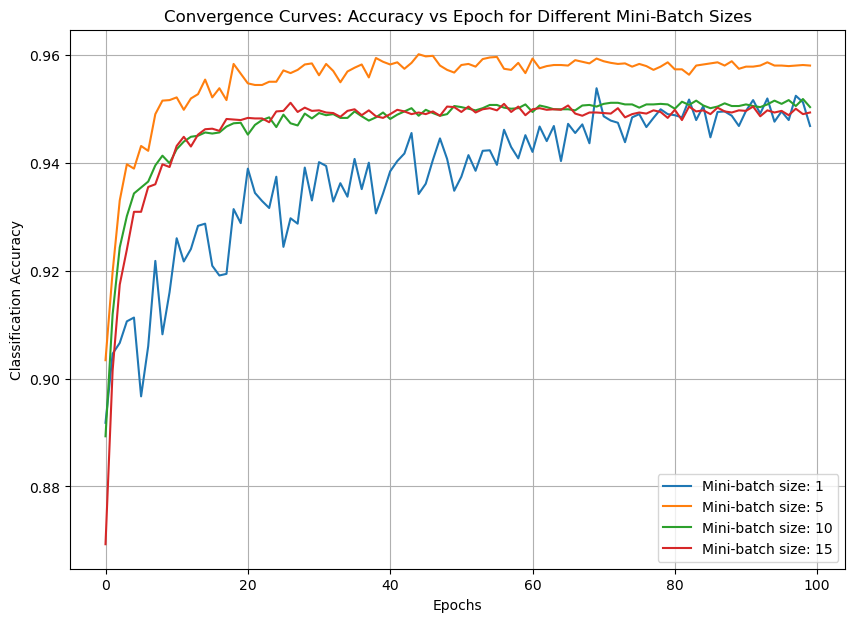

In [9]:
def train_and_store_accuracy_batch_size(network, training_data, test_data, epochs, mini_batch_size, eta):
    """
    Train the network and store accuracy for each epoch with a specific mini-batch size.
    
    Parameters:
    network: Instance of the Network class
    training_data: List of tuples (input, output) for training
    test_data: List of tuples (input, output) for testing
    epochs: Number of training epochs
    mini_batch_size: Size of mini-batches
    eta: Learning rate
    
    Returns:
    accuracy_per_epoch: List of accuracy values for each epoch
    """
    accuracy_per_epoch = []

    for epoch in range(epochs):
        network.SGD(training_data, 1, mini_batch_size, eta, test_data=test_data)  # Train for 1 epoch
        accuracy = network.evaluate(test_data)
        accuracy_per_epoch.append(accuracy / len(test_data))  # Store accuracy as a percentage
        print(f"Epoch {epoch}: {accuracy} / {len(test_data)}")

    return accuracy_per_epoch

def plot_convergence_curves_for_batch_sizes(training_data, test_data, epochs, eta, mini_batch_sizes):
    """
    Train and plot convergence curves for different mini-batch sizes.
    
    Parameters:
    training_data: Training dataset
    test_data: Test dataset
    epochs: Number of epochs
    eta: Learning rate
    mini_batch_sizes: List of mini-batch sizes to compare
    """
    plt.figure(figsize=(10, 7))
    
    architecture = [784, 64, 32, 10]  # the network structure with the best performance above

    for mini_batch_size in mini_batch_sizes:
        # Initialize the network with the given architecture
        net = Network(architecture)
        # Train the network with the specified mini-batch size and store accuracy per epoch
        accuracy_per_epoch = train_and_store_accuracy_batch_size(net, training_data, test_data, epochs, mini_batch_size, eta)
        # Plot the accuracy curve for this mini-batch size
        plt.plot(range(epochs), accuracy_per_epoch, label=f"Mini-batch size: {mini_batch_size}")

    # Plot details
    plt.title("Convergence Curves: Accuracy vs Epoch for Different Mini-Batch Sizes")
    plt.xlabel("Epochs")
    plt.ylabel("Classification Accuracy")
    plt.grid(True)
    plt.legend()
    plt.show()


# Define the mini-batch sizes to test
mini_batch_sizes = [1, 5, 10, 15]

# Using the earlier loaded training data
plot_convergence_curves_for_batch_sizes(training_data, test_data, epochs=100, eta=1.0, mini_batch_sizes=mini_batch_sizes)

### Comment: Performance here does not have a linear relationship with mini-batch size, rather it was observed that mini-batch size of 5 gave an incredibly outstanding performance while mini-batch size of 1 gave the poorest performance.

## EFFECT OF LEARNING RATE

Epoch 0: 9018 / 10000
Epoch 0: 9018 / 10000
Epoch 0: 9245 / 10000
Epoch 1: 9245 / 10000
Epoch 0: 9316 / 10000
Epoch 2: 9316 / 10000
Epoch 0: 9353 / 10000
Epoch 3: 9353 / 10000
Epoch 0: 9403 / 10000
Epoch 4: 9403 / 10000
Epoch 0: 9453 / 10000
Epoch 5: 9453 / 10000
Epoch 0: 9453 / 10000
Epoch 6: 9453 / 10000
Epoch 0: 9504 / 10000
Epoch 7: 9504 / 10000
Epoch 0: 9491 / 10000
Epoch 8: 9491 / 10000
Epoch 0: 9481 / 10000
Epoch 9: 9481 / 10000
Epoch 0: 9488 / 10000
Epoch 10: 9488 / 10000
Epoch 0: 9514 / 10000
Epoch 11: 9514 / 10000
Epoch 0: 9489 / 10000
Epoch 12: 9489 / 10000
Epoch 0: 9515 / 10000
Epoch 13: 9515 / 10000
Epoch 0: 9532 / 10000
Epoch 14: 9532 / 10000
Epoch 0: 9516 / 10000
Epoch 15: 9516 / 10000
Epoch 0: 9519 / 10000
Epoch 16: 9519 / 10000
Epoch 0: 9549 / 10000
Epoch 17: 9549 / 10000
Epoch 0: 9522 / 10000
Epoch 18: 9522 / 10000
Epoch 0: 9552 / 10000
Epoch 19: 9552 / 10000
Epoch 0: 9537 / 10000
Epoch 20: 9537 / 10000
Epoch 0: 9539 / 10000
Epoch 21: 9539 / 10000
Epoch 0: 9527 / 1000

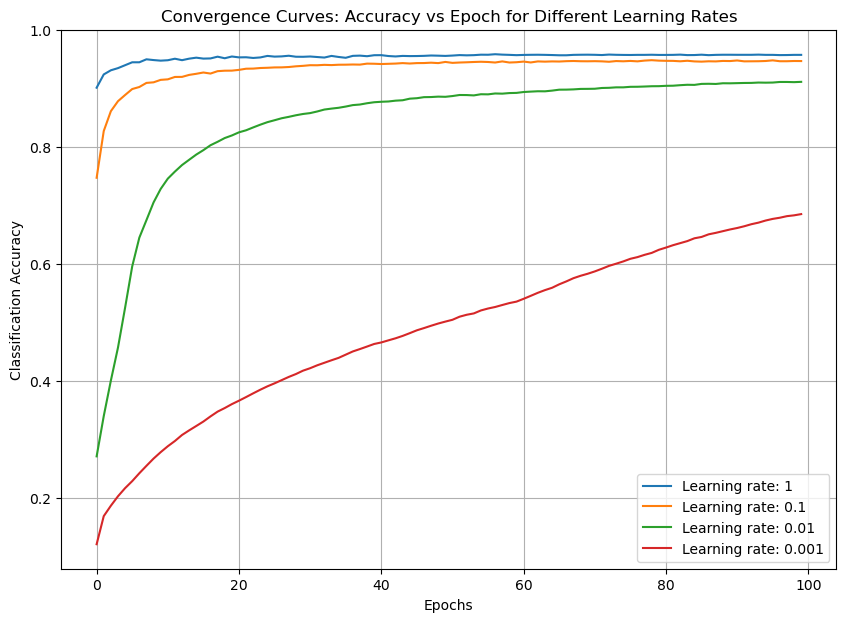

In [168]:
def train_and_store_accuracy_lr(network, training_data, test_data, epochs, mini_batch_size, eta):
    """
    Train the network and store accuracy for each epoch with a specific learning rate (eta).
    
    Parameters:
    network: Instance of the Network class
    training_data: List of tuples (input, output) for training
    test_data: List of tuples (input, output) for testing
    epochs: Number of training epochs
    mini_batch_size: Size of mini-batches
    eta: Learning rate
    
    Returns:
    accuracy_per_epoch: List of accuracy values for each epoch
    """
    accuracy_per_epoch = []

    for epoch in range(epochs):
        network.SGD(training_data, 1, mini_batch_size, eta, test_data=test_data)  # Train for 1 epoch
        accuracy = network.evaluate(test_data)
        accuracy_per_epoch.append(accuracy / len(test_data))  # Store accuracy as a percentage
        print(f"Epoch {epoch}: {accuracy} / {len(test_data)}")

    return accuracy_per_epoch

def plot_convergence_curves_for_lr(training_data, test_data, epochs, mini_batch_size, learning_rates):
    """
    Train and plot convergence curves for different learning rates.
    
    Parameters:
    training_data: Training dataset
    test_data: Test dataset
    epochs: Number of epochs
    mini_batch_size: Fixed mini-batch size
    learning_rates: List of learning rates to compare
    """
    plt.figure(figsize=(10, 7))
    
    architecture = [784, 64, 32, 10]  # Fixed architecture with 2 hidden layers (64, 32 nodes)

    for eta in learning_rates:
        # Initialize the network with the given architecture
        net = Network(architecture)
        # Train the network with the specified learning rate and store accuracy per epoch
        accuracy_per_epoch = train_and_store_accuracy_lr(net, training_data, test_data, epochs, mini_batch_size, eta)
        # Plot the accuracy curve for this learning rate
        plt.plot(range(epochs), accuracy_per_epoch, label=f"Learning rate: {eta}")

    # Plot details
    plt.title("Convergence Curves: Accuracy vs Epoch for Different Learning Rates")
    plt.xlabel("Epochs")
    plt.ylabel("Classification Accuracy")
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage:
# Define the learning rates to test
learning_rates = [1, 0.1, 0.01, 0.001]

# Assuming training_data and test_data are loaded (from MNIST or similar)
plot_convergence_curves_for_lr(training_data, test_data, epochs=100, mini_batch_size=5, learning_rates=learning_rates)

### With network structure of [784, 64, 32, 10] and mini-batch size 5, the learning rate with the best performance is learning rate of 1 while the learning rate with the poorest performcance is the learning rate of 0.001. The general pattern observed is that the higher the learning rate, the better the performance of the network

# TASK 3.3

## WHY BACKPROPAGATION IS A FASTER ALGORITHM ACCORDING TO CHAPTER 2 OF NIELSON'S BOOK
In Chapter 2 of Neural Networks and Deep Learning by Michael A. Nielsen (2015), backpropagation is presented as a crucial algorithm for efficiently training neural networks. The key reason backpropagation is faster than alternative methods is its ability to compute the gradient of the cost function with respect to all the network’s weights and biases simultaneously, using a systematic approach. This efficiency arises from the chain rule of calculus, which backpropagation exploits by propagating errors backward through the network layer by layer.
Without backpropagation, one would need to compute the gradient of the cost function individually for each weight and bias in the network, which would be computationally prohibitive, especially for large neural networks with millions of parameters. In contrast, backpropagation reuses intermediate results (such as activations and errors) as it moves backward through the network, thus reducing redundant calculations and saving computational resources.
Furthermore, backpropagation leverages vectorized operations, allowing it to take full advantage of modern hardware such as GPUs, which excel at parallel computations. By efficiently calculating gradients, backpropagation enables the use of gradient descent (or its variants) to update network parameters quickly, making it feasible to train deep networks on large datasets within a reasonable amount of time. Hence, the speed and practicality of neural network training largely rely on the efficient error propagation provided by the backpropagation algorithm


## PERFORMANCE COMPARISON
I will use a set of hyperparameter used in Nielson's book to train a neural network and compare the performance of my network with that of Nielson

In [24]:
# Here I train a network with the same combination of hyperparameters as in Nielson's book

# The network structure used has an input layer with 784 nodes, one hidden layer of 30 notes and an output node of 10 nodes
net = Network([784, 30, 10])

# Just as in the Nielson's book, I will train the network on training data for 30 epoch, 10 mini-batch size and learning rate of 10
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0: 9130 / 10000
Epoch 1: 9201 / 10000
Epoch 2: 9269 / 10000
Epoch 3: 9318 / 10000
Epoch 4: 9368 / 10000
Epoch 5: 9401 / 10000
Epoch 6: 9374 / 10000
Epoch 7: 9394 / 10000
Epoch 8: 9431 / 10000
Epoch 9: 9441 / 10000
Epoch 10: 9413 / 10000
Epoch 11: 9427 / 10000
Epoch 12: 9438 / 10000
Epoch 13: 9425 / 10000
Epoch 14: 9475 / 10000
Epoch 15: 9444 / 10000
Epoch 16: 9441 / 10000
Epoch 17: 9472 / 10000
Epoch 18: 9456 / 10000
Epoch 19: 9450 / 10000
Epoch 20: 9478 / 10000
Epoch 21: 9461 / 10000
Epoch 22: 9468 / 10000
Epoch 23: 9475 / 10000
Epoch 24: 9489 / 10000
Epoch 25: 9456 / 10000
Epoch 26: 9471 / 10000
Epoch 27: 9476 / 10000
Epoch 28: 9476 / 10000
Epoch 29: 9480 / 10000


Nielson, in his book achieved 9,129 correct classification out of 10,000 in the first epoch while I achieved 9,130 after the first epoch using the same combination of hyperparameter. Just like in the book, my network's performance grew steadily with increase in the number of epoch. At the peak of it's performance, the network in Nielson's book achieved accuracy of 95.42% at the 28th epoch while my network achieved its peak of 94.89% at the 24th epoch. Overall, the performance of both network are within the same range and the difference can be well attributed to random error associated with how the initialization of the weights and biases were done.

# TASK 4.1

Epoch 1: Accuracy = 25.00%
Epoch 2: Accuracy = 25.00%
Epoch 3: Accuracy = 25.00%
Epoch 4: Accuracy = 0.00%
Epoch 5: Accuracy = 0.00%
Epoch 6: Accuracy = 0.00%
Epoch 7: Accuracy = 0.00%
Epoch 8: Accuracy = 0.00%
Epoch 9: Accuracy = 0.00%
Epoch 10: Accuracy = 25.00%
Epoch 11: Accuracy = 25.00%
Epoch 12: Accuracy = 25.00%
Epoch 13: Accuracy = 25.00%
Epoch 14: Accuracy = 25.00%
Epoch 15: Accuracy = 25.00%
Epoch 16: Accuracy = 25.00%
Epoch 17: Accuracy = 25.00%
Epoch 18: Accuracy = 25.00%
Epoch 19: Accuracy = 25.00%
Epoch 20: Accuracy = 25.00%
Epoch 21: Accuracy = 25.00%
Epoch 22: Accuracy = 25.00%
Epoch 23: Accuracy = 25.00%
Epoch 24: Accuracy = 25.00%
Epoch 25: Accuracy = 25.00%
Epoch 26: Accuracy = 25.00%
Epoch 27: Accuracy = 25.00%
Epoch 28: Accuracy = 25.00%
Epoch 29: Accuracy = 25.00%
Epoch 30: Accuracy = 25.00%
Epoch 31: Accuracy = 25.00%
Epoch 32: Accuracy = 25.00%
Epoch 33: Accuracy = 25.00%
Epoch 34: Accuracy = 25.00%
Epoch 35: Accuracy = 25.00%
Epoch 36: Accuracy = 25.00%
Epoch 3

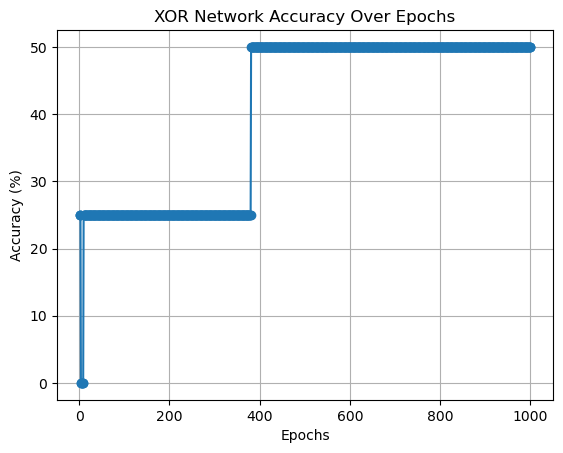

In [69]:
def train_xor_with_accuracy(network, training_data, epochs=1000, learning_rate=0.1, mini_batch_size=1):
    """Train the XOR network and plot accuracy after each epoch."""
    training_data = list(zip(training_data[0], training_data[1]))
    accuracy_list = []  # List to store accuracy for each epoch
    
    for epoch in range(epochs):
        random.shuffle(training_data)
        mini_batches = [training_data[k:k + mini_batch_size] for k in range(0, len(training_data), mini_batch_size)]
        
        for mini_batch in mini_batches:
            network.update_mini_batch(mini_batch, learning_rate)
        
        # Calculate accuracy for the training data after each epoch
        accuracy = network.evaluate(training_data)
        accuracy_percentage = accuracy / len(training_data) * 100
        accuracy_list.append(accuracy_percentage)  # Store accuracy for the epoch
        print(f"Epoch {epoch + 1}: Accuracy = {accuracy_percentage:.2f}%")

    # Plotting accuracy against epochs
    plt.plot(range(1, epochs + 1), accuracy_list, marker='o')
    plt.title('XOR Network Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.grid()
    plt.show()

# XOR input and labels
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([-1, 1, 1, -1])

# Initialize the network for XOR
xor_network = Network([2, 2, 1])  # Example: 2 input nodes, 2 hidden nodes, 1 output node

# Train the XOR network
train_xor_with_accuracy(xor_network, (X, y), epochs=1000, learning_rate=0.1, mini_batch_size=1)

## EFFECT OF NETWORK STRUCTURE

Epoch 0: Accuracy = 3/4
Epoch 1: Accuracy = 3/4
Epoch 2: Accuracy = 3/4
Epoch 3: Accuracy = 3/4
Epoch 4: Accuracy = 3/4
Epoch 5: Accuracy = 3/4
Epoch 6: Accuracy = 3/4
Epoch 7: Accuracy = 3/4
Epoch 8: Accuracy = 3/4
Epoch 9: Accuracy = 3/4
Epoch 10: Accuracy = 3/4
Epoch 11: Accuracy = 3/4
Epoch 12: Accuracy = 3/4
Epoch 13: Accuracy = 3/4
Epoch 14: Accuracy = 3/4
Epoch 15: Accuracy = 3/4
Epoch 16: Accuracy = 3/4
Epoch 17: Accuracy = 3/4
Epoch 18: Accuracy = 3/4
Epoch 19: Accuracy = 3/4
Epoch 20: Accuracy = 3/4
Epoch 21: Accuracy = 3/4
Epoch 22: Accuracy = 3/4
Epoch 23: Accuracy = 3/4
Epoch 24: Accuracy = 3/4
Epoch 25: Accuracy = 3/4
Epoch 26: Accuracy = 3/4
Epoch 27: Accuracy = 3/4
Epoch 28: Accuracy = 3/4
Epoch 29: Accuracy = 3/4
Epoch 30: Accuracy = 3/4
Epoch 31: Accuracy = 3/4
Epoch 32: Accuracy = 3/4
Epoch 33: Accuracy = 3/4
Epoch 34: Accuracy = 3/4
Epoch 35: Accuracy = 3/4
Epoch 36: Accuracy = 3/4
Epoch 37: Accuracy = 3/4
Epoch 38: Accuracy = 3/4
Epoch 39: Accuracy = 3/4
Epoch 40: 

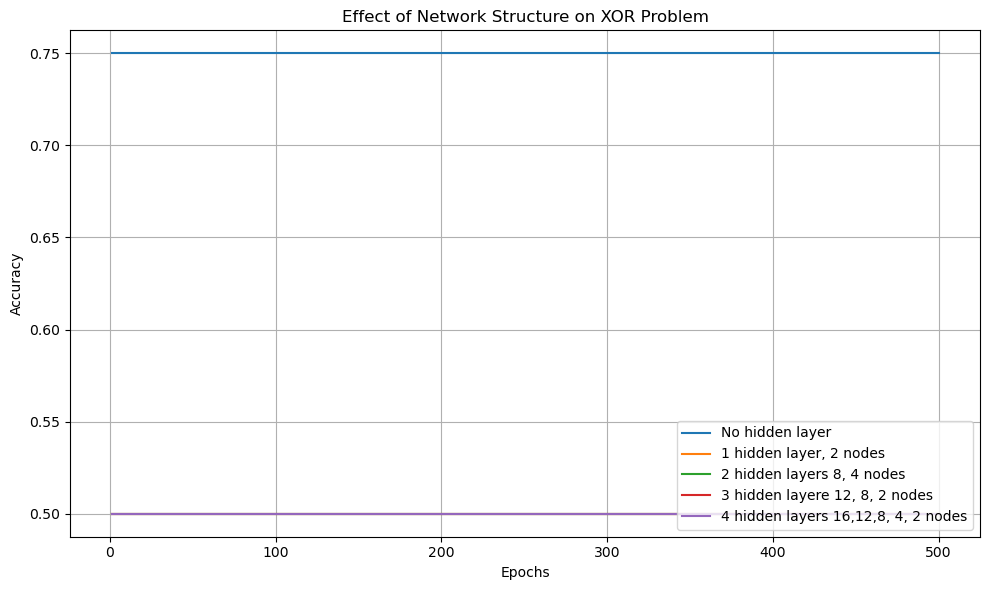

In [129]:
# XOR dataset
XOR_data = [
    (np.array([-1, -1]), -1),
    (np.array([-1, 1]), 1),
    (np.array([1, -1]), 1),
    (np.array([1, 1]), -1)
]

# Convert to the format expected by the network (input, label)
train_set = [(x.reshape(-1, 1), 0 if y == -1 else 1) for x, y in XOR_data]

# Configurations to test with increasing complexity in network structure
configs = [
    ([2, 1], "No hidden layer"),
    ([2, 2, 1], "1 hidden layer, 2 nodes"),
    ([2, 8, 4, 1], "2 hidden layers 8, 4 nodes"),
    ([2, 12, 8, 2, 1], "3 hidden layere 12, 8, 2 nodes"),
    ([2, 16, 12, 8, 4, 1], "4 hidden layers 16,12,8, 4, 2 nodes")
]

# Parameters
epochs = 500
mini_batch_size = 1
learning_rate = 0.0001

# Dictionary to store accuracies across epochs for each network structure
accuracies = {label: [] for _, label in configs}

# Train the networks and capture accuracies
for config, label in configs:
    net = Network(sizes=config)
    accuracy_list = net.SGD(training_data=train_set, epochs=epochs, mini_batch_size=mini_batch_size, eta=learning_rate, test_data=train_set)
    
    # Calculate and store accuracy per epoch
    accuracies[label] = [accuracy / len(train_set) for accuracy in accuracy_list]  # Normalize accuracy

# Plot accuracy vs. epochs for each network structure
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for label, accuracy in accuracies.items():
    plt.plot(range(1, epochs + 1), accuracy, label=label)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Effect of Network Structure on XOR Problem')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


### Comment: The implest network structure, without hidden layer gave the best performance of 75% accurate classification. All other network structure gave performance of 50% 

## EFFECT OF DIFFERENT LEARNING RATE
### Perfect accuracy achieved using the main network

Training with learning rate 1
Epoch 1: 2 / 4
Epoch 2: 2 / 4
Epoch 3: 2 / 4
Epoch 4: 2 / 4
Epoch 5: 2 / 4
Epoch 6: 2 / 4
Epoch 7: 2 / 4
Epoch 8: 2 / 4
Epoch 9: 2 / 4
Epoch 10: 2 / 4
Epoch 11: 2 / 4
Epoch 12: 2 / 4
Epoch 13: 2 / 4
Epoch 14: 2 / 4
Epoch 15: 2 / 4
Epoch 16: 2 / 4
Epoch 17: 2 / 4
Epoch 18: 2 / 4
Epoch 19: 2 / 4
Epoch 20: 2 / 4
Epoch 21: 2 / 4
Epoch 22: 2 / 4
Epoch 23: 2 / 4
Epoch 24: 2 / 4
Epoch 25: 2 / 4
Epoch 26: 2 / 4
Epoch 27: 2 / 4
Epoch 28: 2 / 4
Epoch 29: 2 / 4
Epoch 30: 2 / 4
Epoch 31: 2 / 4
Epoch 32: 2 / 4
Epoch 33: 2 / 4
Epoch 34: 2 / 4
Epoch 35: 2 / 4
Epoch 36: 2 / 4
Epoch 37: 2 / 4
Epoch 38: 2 / 4
Epoch 39: 2 / 4
Epoch 40: 2 / 4
Epoch 41: 2 / 4
Epoch 42: 2 / 4
Epoch 43: 2 / 4
Epoch 44: 2 / 4
Epoch 45: 2 / 4
Epoch 46: 2 / 4
Epoch 47: 2 / 4
Epoch 48: 2 / 4
Epoch 49: 2 / 4
Epoch 50: 2 / 4
Epoch 51: 2 / 4
Epoch 52: 2 / 4
Epoch 53: 2 / 4
Epoch 54: 2 / 4
Epoch 55: 2 / 4
Epoch 56: 2 / 4
Epoch 57: 2 / 4
Epoch 58: 2 / 4
Epoch 59: 2 / 4
Epoch 60: 2 / 4
Epoch 61: 2 / 4
Epo

C:\Users\USER\AppData\Local\Temp\ipykernel_19032\1705849936.py:93: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return sum(int(x == y) for (x, y) in test_results)


Epoch 303: 1 / 4
Epoch 304: 1 / 4
Epoch 305: 1 / 4
Epoch 306: 1 / 4
Epoch 307: 1 / 4
Epoch 308: 1 / 4
Epoch 309: 1 / 4
Epoch 310: 1 / 4
Epoch 311: 1 / 4
Epoch 312: 1 / 4
Epoch 313: 1 / 4
Epoch 314: 1 / 4
Epoch 315: 1 / 4
Epoch 316: 1 / 4
Epoch 317: 1 / 4
Epoch 318: 1 / 4
Epoch 319: 1 / 4
Epoch 320: 1 / 4
Epoch 321: 1 / 4
Epoch 322: 1 / 4
Epoch 323: 1 / 4
Epoch 324: 1 / 4
Epoch 325: 1 / 4
Epoch 326: 1 / 4
Epoch 327: 1 / 4
Epoch 328: 1 / 4
Epoch 329: 1 / 4
Epoch 330: 1 / 4
Epoch 331: 1 / 4
Epoch 332: 1 / 4
Epoch 333: 1 / 4
Epoch 334: 1 / 4
Epoch 335: 1 / 4
Epoch 336: 1 / 4
Epoch 337: 1 / 4
Epoch 338: 1 / 4
Epoch 339: 1 / 4
Epoch 340: 1 / 4
Epoch 341: 1 / 4
Epoch 342: 1 / 4
Epoch 343: 1 / 4
Epoch 344: 1 / 4
Epoch 345: 1 / 4
Epoch 346: 1 / 4
Epoch 347: 1 / 4
Epoch 348: 1 / 4
Epoch 349: 1 / 4
Epoch 350: 1 / 4
Epoch 351: 1 / 4
Epoch 352: 1 / 4
Epoch 353: 1 / 4
Epoch 354: 1 / 4
Epoch 355: 1 / 4
Epoch 356: 1 / 4
Epoch 357: 1 / 4
Epoch 358: 1 / 4
Epoch 359: 1 / 4
Epoch 360: 1 / 4
Epoch 361: 1 /

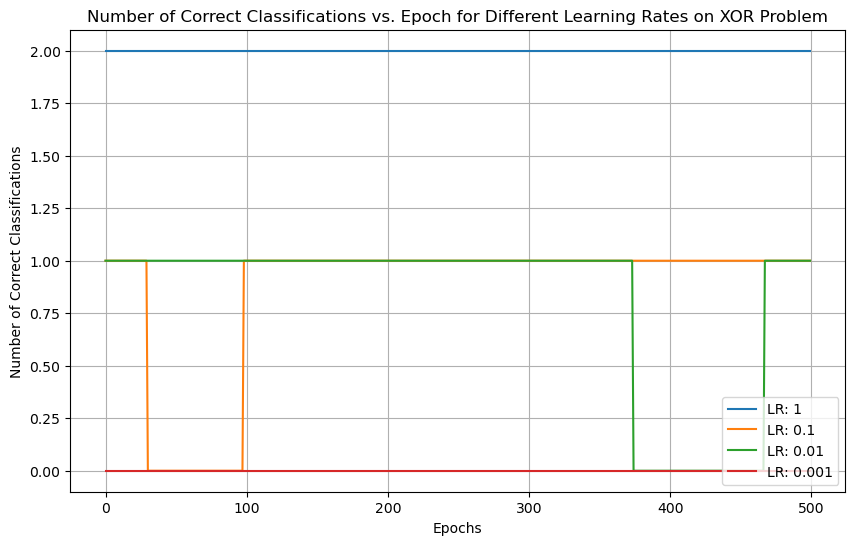

In [119]:
# XOR dataset
def generate_xor_data():
    xor_inputs = [np.array([[-1], [-1]]), np.array([[-1], [1]]), np.array([[1], [-1]]), np.array([[1], [1]])]
    xor_outputs = [np.array([[-1]]), np.array([[1]]), np.array([[1]]), np.array([[-1]])]
    return list(zip(xor_inputs, xor_outputs))

# Plot correct classifications vs. epoch
def plot_correct_classifications(correct_classifications, learning_rates, epochs):
    plt.figure(figsize=(10, 6))
    for lr, classifications in correct_classifications.items():
        plt.plot(range(epochs), classifications, label=f'LR: {lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Number of Correct Classifications')
    plt.title('Number of Correct Classifications vs. Epoch for Different Learning Rates on XOR Problem')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Training the network for XOR gate
if __name__ == "__main__":
    xor_data = generate_xor_data()
    train_set = xor_data

    # Define the network structure (2-3-1 for XOR)
    network_structure = [2, 1]

    # Different learning rates
    learning_rates = [1, 0.1, 0.01, 0.001]
    epochs = 500
    mini_batch_size = 1

    correct_classifications = {}

    for lr in learning_rates:
        print(f"Training with learning rate {lr}")
        net = Network(network_structure)
        classification_list = net.SGD(training_data=train_set, epochs=epochs, mini_batch_size=mini_batch_size, eta=lr, test_data=train_set)
        correct_classifications[lr] = classification_list

    plot_correct_classifications(correct_classifications, learning_rates, epochs)

### Comment: Learning rate of 1 gave the best performance of 50% correct classification. There is not specific pattern in performance across various learning rate.

## EFFECT OF DIFFERENT INITIALIZATION STRATEGY

C:\Users\USER\AppData\Local\Temp\ipykernel_19032\1705849936.py:93: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return sum(int(x == y) for (x, y) in test_results)


Epoch 1: 2 / 4
Epoch 2: 2 / 4
Epoch 3: 2 / 4
Epoch 4: 2 / 4
Epoch 5: 2 / 4
Epoch 6: 2 / 4
Epoch 7: 2 / 4
Epoch 8: 2 / 4
Epoch 9: 2 / 4
Epoch 10: 2 / 4
Epoch 11: 2 / 4
Epoch 12: 2 / 4
Epoch 13: 2 / 4
Epoch 14: 2 / 4
Epoch 15: 2 / 4
Epoch 16: 2 / 4
Epoch 17: 2 / 4
Epoch 18: 2 / 4
Epoch 19: 2 / 4
Epoch 20: 2 / 4
Epoch 21: 2 / 4
Epoch 22: 2 / 4
Epoch 23: 2 / 4
Epoch 24: 2 / 4
Epoch 25: 2 / 4
Epoch 26: 2 / 4
Epoch 27: 2 / 4
Epoch 28: 2 / 4
Epoch 29: 2 / 4
Epoch 30: 2 / 4
Epoch 31: 2 / 4
Epoch 32: 2 / 4
Epoch 33: 2 / 4
Epoch 34: 2 / 4
Epoch 35: 2 / 4
Epoch 36: 2 / 4
Epoch 37: 2 / 4
Epoch 38: 2 / 4
Epoch 39: 2 / 4
Epoch 40: 2 / 4
Epoch 41: 2 / 4
Epoch 42: 2 / 4
Epoch 43: 2 / 4
Epoch 44: 2 / 4
Epoch 45: 2 / 4
Epoch 46: 2 / 4
Epoch 47: 3 / 4
Epoch 48: 3 / 4
Epoch 49: 3 / 4
Epoch 50: 3 / 4
Epoch 51: 3 / 4
Epoch 52: 3 / 4
Epoch 53: 3 / 4
Epoch 54: 3 / 4
Epoch 55: 3 / 4
Epoch 56: 3 / 4
Epoch 57: 3 / 4
Epoch 58: 3 / 4
Epoch 59: 3 / 4
Epoch 60: 3 / 4
Epoch 61: 3 / 4
Epoch 62: 3 / 4
Epoch 63: 3 / 4
E

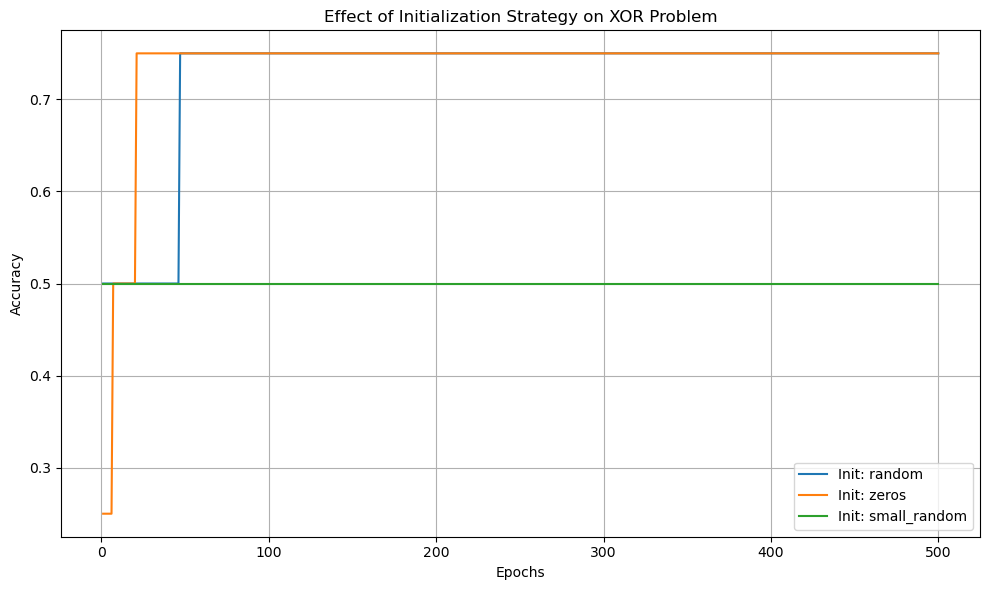

In [80]:
# XOR dataset
XOR_data = [
    (np.array([-1, -1]), -1),
    (np.array([-1, 1]), 1),
    (np.array([1, -1]), 1),
    (np.array([1, 1]), -1)
]

# Convert to the format expected by the network (input, label)
train_set = [(x.reshape(-1, 1), 0 if y == -1 else 1) for x, y in XOR_data]


# Step 1: Define Initialization Strategies as Separate Functions

def random_initialization(sizes):
    """Random Gaussian initialization."""
    biases = [np.random.randn(y, 1) for y in sizes[1:]]
    weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
    return weights, biases

def zero_initialization(sizes):
    """Initialize weights and biases to zeros."""
    biases = [np.zeros((y, 1)) for y in sizes[1:]]
    weights = [np.zeros((y, x)) for x, y in zip(sizes[:-1], sizes[1:])]
    return weights, biases

def small_random_initialization(sizes):
    """Small random values initialization."""
    biases = [np.random.randn(y, 1) * 0.01 for y in sizes[1:]]
    weights = [np.random.randn(y, x) * 0.01 for x, y in zip(sizes[:-1], sizes[1:])]
    return weights, biases


# Step 2: Reuse the Existing Network and Apply the Initialization Strategy

# Network configuration: 2 input nodes, 1 output node (No hidden layer)
network_structure = [2, 1]

# Parameters
epochs = 500
mini_batch_size = 5
learning_rate = 1  # Fixed learning rate

# Initialization strategies to test
initialization_functions = {
    "random": random_initialization,
    "zeros": zero_initialization,
    "small_random": small_random_initialization
}

# Dictionary to store accuracies across epochs for each initialization strategy
accuracies = {name: [] for name in initialization_functions.keys()}

# Train the networks and capture accuracies for each initialization strategy
for name, init_func in initialization_functions.items():
    weights, biases = init_func(network_structure)
    net = Network(sizes=network_structure)  # Initialize the network with specific weights and biases
    accuracy_list = net.SGD(training_data=train_set, epochs=epochs, mini_batch_size=mini_batch_size, eta=learning_rate, test_data=train_set)
    
    # Normalize accuracy per epoch
    accuracies[name] = [accuracy / len(train_set) for accuracy in accuracy_list]

# Plot accuracy vs. epochs for each initialization strategy
plt.figure(figsize=(10, 6))

for name, accuracy in accuracies.items():
    plt.plot(range(1, epochs + 1), accuracy, label=f'Init: {name}')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Effect of Initialization Strategy on XOR Problem')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


### COMMENT: it's often more difficult to train smaller networks because they have limited flexibility and capacity to learn complex patterns, making them more susceptible to underfitting. Larger networks, though more prone to overfitting, can adapt more readily to complex data due to their increased number of parameters.

## TASK 4.2 PERCEPTRON ON HIGHER DIMENSION
### See the attached hand-written document for the derivation part of TASK 4.2

Learned weights: [ 0.          0.         -5.65685425  0.          0.          0.        ]
Learned bias: 0


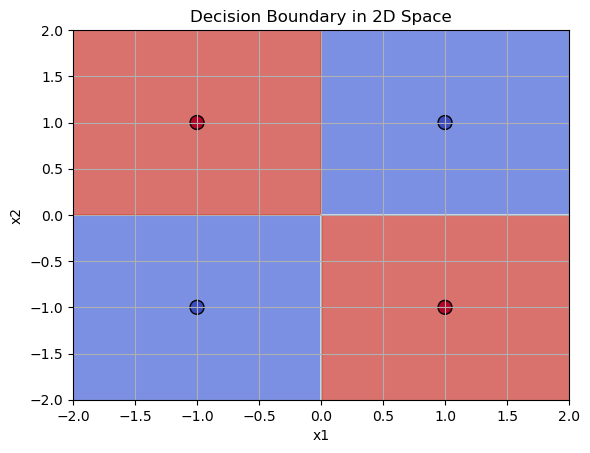

In [148]:
# Define the XOR dataset (2D samples)
XOR_data = [
    (np.array([-1, -1]), -1),
    (np.array([-1, 1]), 1),
    (np.array([1, -1]), 1),
    (np.array([1, 1]), -1)
]

# Convert labels -1 and 1 to 0 and 1 for perceptron compatibility
train_set = [(x.reshape(-1, 1), 0 if y == -1 else 1) for x, y in XOR_data]

# Define the 2nd-degree polynomial basis function (higher-dimensional space)
def phi(x, C=1):
    x1, x2 = x.flatten()
    return np.array([
        x1**2,
        x2**2,
        np.sqrt(2) * x1 * x2,
        np.sqrt(2) * C * x1,
        np.sqrt(2) * C * x2,
        C
    ]).reshape(-1, 1)

# Map all training samples to the higher-dimensional space
train_set_high_dim = [(phi(x), y) for x, y in train_set]

# Perceptron class implementation
class Perceptron:
    def __init__(self, input_size, learning_rate=1):
        self.weights = np.zeros((input_size, 1))
        self.bias = 0
        self.learning_rate = learning_rate
    
    def predict(self, x):
        linear_output = np.dot(self.weights.T, x) + self.bias
        return 1 if linear_output >= 0 else 0

    def train(self, training_data, epochs=10):
        for epoch in range(epochs):
            for x, label in training_data:
                prediction = self.predict(x)
                error = label - prediction
                # Update rule for perceptron
                self.weights += self.learning_rate * error * x
                self.bias += self.learning_rate * error

# Initialize the Perceptron model with 6 inputs (dimensionality after mapping)
input_size = 6  # Higher dimensional space size
perceptron = Perceptron(input_size=input_size, learning_rate=1)

# Train the perceptron on the higher-dimensional data
epochs = 10
perceptron.train(train_set_high_dim, epochs=epochs)

# Output learned weights and bias
print("Learned weights:", perceptron.weights.flatten())
print("Learned bias:", perceptron.bias)

# Plot decision boundary in the original 2D space
def plot_decision_boundary(perceptron, C=1):
    x_min, x_max = -2, 2
    y_min, y_max = -2, 2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    Z = np.zeros_like(xx)
    
    # Map each point in the grid to the higher-dimensional space and predict
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            point = np.array([xx[i, j], yy[i, j]]).reshape(-1, 1)
            point_high_dim = phi(point, C)
            Z[i, j] = perceptron.predict(point_high_dim)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
    plt.scatter([-1, -1, 1, 1], [-1, 1, -1, 1], c=[0, 1, 1, 0], edgecolor='k', s=100, cmap='coolwarm')
    plt.title('Decision Boundary in 2D Space')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True)
    plt.show()

# Plot the learned decision boundary
plot_decision_boundary(perceptron)

### COMMENT ON IMPLEMENTATION OF XOR: The implementation of XOR has been proven to be very difficult. In other words, even though MLP has the ability to train XOR, the performance of the models were generally poor with the best performance at 75% correct accuracy. The training of XOR in 4.1 was generally very difficult, due to the fact that samples in the XOR gate are not linearly seperable. However, in 4.2, the kernel trick was used to project the training samples from 2 dimension to 6 dimension making it easy for perceptron to correctly train the XOR.